<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/EstatisticaPOS_trab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PÓS-GRADUAÇÃO EM CIÊNCIAS DE DADOS E BIG DATA ESTATISTICA GERAL

## Trabalho 01 - Estatistica descritiva

### Exercicio 01 - Fabrica de azulejos

#### Situação Problema
Uma fábrica de azulejos recentemente começou a receber reclamações de seus clientes. A maioria das
reclamações era relativa aos seguintes problemas:
- Os azulejos, ao serem manuseados, quebravam-se facilmente
- O assentamento dos azulejos não produzia um resultado uniforme em relação ao nível da parede.

#### Hipóteses

Em vista dessa situação, o gerente de vendas da indústria decidiu formar um grupo de trabalho para estudar estes
problemas. Na primeira fase do estudo, o grupo de trabalho concluiu que a produção de azulejos com espessura não
adequada poderia ser a causa dos problemas relatados pelos clientes. Esta conclusão resultou do conhecimento dos
seguintes fatos:
- Azulejos com espessura muito fina quebram-se facilmente.
- A falta de uniformidade na espessura dos azulejos provoca dificuldades durante o seu assentamento.

#### Premissas

Sabe-se que os limites de especificação para a espessura dos azulejos são 5,0 +- 1.5mm, ou seja, a
espessura dos azulejos deve variar entre 3.5 a 6.5 mm, sendo o valor nominal de especificação igual a 5.0 mm.



### Análise

Para avaliar se estavam ocorrendo problemas com a espessura dos azulejos produzidos, o grupo decidiu
retirar uma amostra aleatória dos azulejos fabricados pela empresa, medir a espessura destes azulejos e
comparar os resultados obtidos com as especificações. Como a indústria empregava duas turmas de trabalho
(turmas A e B) e poderia haver diferença na qualidade dos azulejos produzidos por cada turma, foi utilizada
uma estratificação, sendo então retirada uma amostra de 80 azulejos produzidos pela turma A e 80
fabricados pela turma B. Os dados com as medidas de espessura (em mm) de 160 azulejos produzidos pela fábrica
separados por turma de trabalho coletados estão apresentados no arquivo **Azulejo.csv**

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import json

# Inicializando DataFrame

df_azulejo = pd.read_csv('/tmp/Azulejo.csv', sep=';')

# Transformando str para float

df_azulejo['Espessura'] = df_azulejo.Espessura.str.replace(',', '.').astype(float)


In [ ]:
# Descrevendo dados da tabela de Azulejos
# Informações sobre a table
df_azulejo.info()

# Descrição das variáveis Mapeadas
 
print("""

Variáveis mapeadas: 
-----------------------------------
|    Espessura    |    Turma      |
-----------------------------------
|    Quantitativa |   Qualitativa |
|      Discreta   |     nominal   |
-----------------------------------

""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Espessura  160 non-null    float64
 1   Turma      160 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Variáveis mapeadas: 
-----------------------------------
|    Espessura    |    Turma      |
-----------------------------------
|    Quantitativa |   Qualitativa |
|      Discreta   |     nominal   |
-----------------------------------




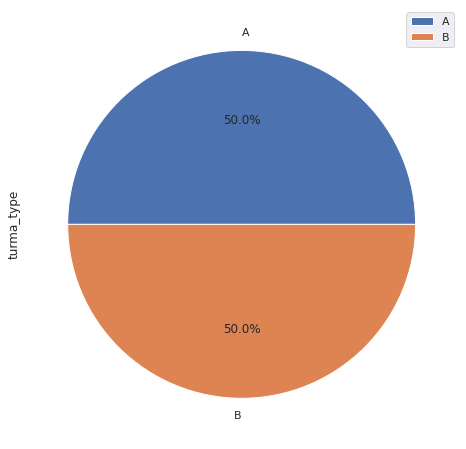

In [ ]:
#
# VARIAVEIS QUALITATIVAS NOMINAIS
# Explorando Dados Categoricos Nominais

type_counts = df_azulejo['Turma'].value_counts() # Conta valores de acordo com Turmas

df_turmas_type = pd.DataFrame({'turma_type': type_counts}, index=['A', 'B'])

df_turmas_type.plot.pie(y='turma_type', figsize=(10,8), autopct='%1.1f%%')

plt.show()

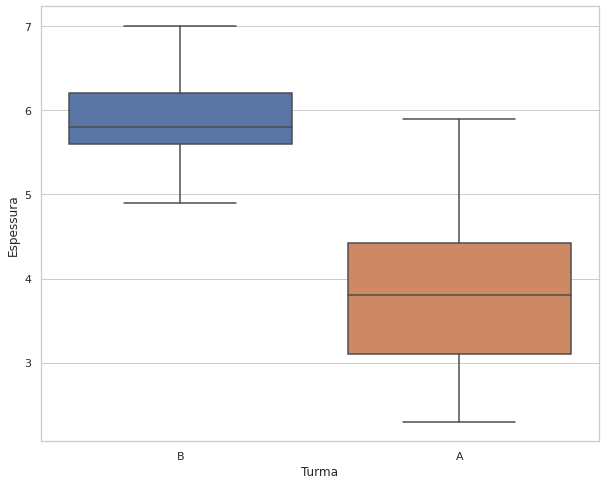

In [ ]:
# Boxplot grafico para distribuição numerica de Turmas A x B
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Turma', y='Espessura', data=df_azulejo, orient="v")

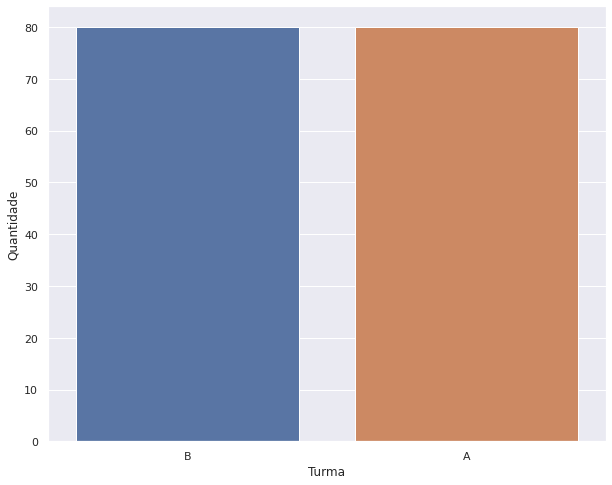

In [ ]:
# Grafico de Barras contagem de Azulejos produzidos por Turmas A x B

sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Turma', data=df_azulejo)
ax.set(ylabel='Quantidade')
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# VARIAVEIS QUANTITATIVAS DISCRETAS
# Descrição de variáveis numericas 

print('Descrição de variações numericas: \n', df_azulejo['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')


Descrição de variações numericas: 

min       2.30
max       7.00
mean      4.87
std       1.23
median    5.30
Name: Espessura, dtype: float64


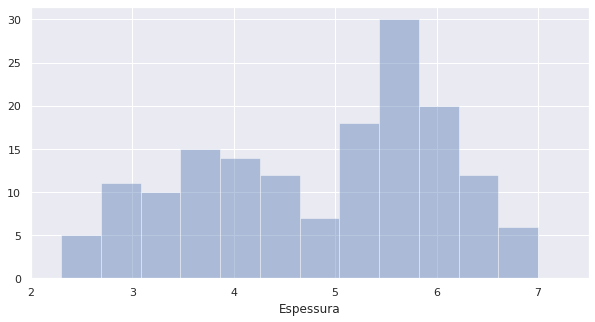

In [ ]:
# Histograma geral de Tabela de Azulejos

filter_data = df_azulejo.dropna(subset=['Espessura']) # Removendo valores nulos de Serie Espessura
plt.figure(figsize=(10,5)) # configurando Tamanho do gráfico
ax = sns.distplot(filter_data['Espessura'], kde=False, bins=11) # plotando grafico de Histrograma
ax.set_xlim(2, 7.5)
plt.show()

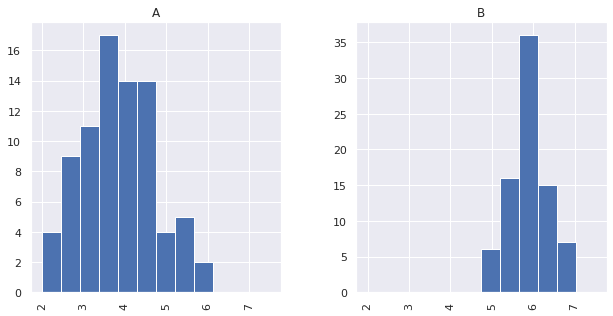

In [ ]:
# Composição do Gráfico Histograma variáveis numericas Para turmas A e B separadamente

df_azulejo.hist(figsize=(10,5), bins=12, range=(2, 7.5), column='Espessura', by='Turma')
plt.show()

### Perguntas a serem respondidas:

a) Você considera que a *“espessura não adequada dos azulejos”* pode ser considerada como uma causa influente dos problemas detectados? Justifique sua resposta.

b) Qual é a forma da distribuição das medidas de espessura dos azulejos produzidos pela fábrica?

c) As proporções de itens produzidos fora da especificação estão relacionadas com as hipóteses da situação problema? Justifique.

### Respostas: 

a) Sim. Como diz a premissa os azulejos, para que tenham uma garantia de qualidade, devem estar dentro do limite especificado para a espessura dos azulejos.

b) Apessar de o gráfico mostrar que tem uma tendencia media muito forte, a forma da distribuição dos azulejos é Assimétrico à esquerda.

c) Sim, pois como apresentado pelo gráfico de histograma, temos uma frequencia alta de azulejos produzidos fora da especificação, apesar de a grande maioria estar presente no intervalo de 3.5 a 6.5 mm.

In [162]:
# 
# Examinando variáveis Espessura de Turmas A e B separadamente do todo
# 

df_turma_A = pd.DataFrame({'Espessura': df_azulejo.query("Turma == 'A'")['Espessura'].tolist()}, columns=['Espessura'])
df_turma_B = pd.DataFrame({'Espessura': df_azulejo.query("Turma == 'B'")['Espessura'].tolist()}, columns=['Espessura'])

print('\nDescrição de variações numericas Turma A:', df_turma_A['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')
print('\nDescrição de variações numericas Turma B:', df_turma_B['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')




Descrição de variações numericas Turma A:
min       2.30
max       5.90
mean      3.86
std       0.87
median    3.80
Name: Espessura, dtype: float64

Descrição de variações numericas Turma B:
min       4.90
max       7.00
mean      5.87
std       0.48
median    5.80
Name: Espessura, dtype: float64


In [181]:
#
# Dicionario de possibilidades 
# 
likelihood = {}

# seleção de eventos para calcular probabilidade

selecao_a_fora_spec = (df_turma_A['Espessura'] < 3.5) | (df_turma_A['Espessura'] > 6.5)
selecao_b_fora_spec = (df_turma_B['Espessura'] < 3.5) | (df_turma_B['Espessura'] > 6.5)
selecao_a_acima_spec = (df_turma_A['Espessura'] > 6.5)
selecao_b_acima_spec = (df_turma_B['Espessura'] > 6.5)
selecao_a_abaixo_spec = (df_turma_A['Espessura'] < 3.5)
selecao_b_abaixo_spec = (df_turma_B['Espessura'] < 3.5)

# Calculo de probabilidade 
prob_fora_espc_A = len(df_turma_A["Espessura"][selecao_a_fora_spec])/len(df_turma_A["Espessura"])
prob_fora_espc_B = len(df_turma_B["Espessura"][selecao_b_fora_spec])/len(df_turma_B["Espessura"])
prob_acima_espc_A = len(df_turma_A["Espessura"][selecao_a_acima_spec])/len(df_turma_A["Espessura"])
prob_acima_espc_B = len(df_turma_B["Espessura"][selecao_b_acima_spec])/len(df_turma_B["Espessura"])
prob_abaixo_espc_A = len(df_turma_A["Espessura"][selecao_a_abaixo_spec])/len(df_turma_A["Espessura"])
prob_abaixo_espc_B = len(df_turma_B["Espessura"][selecao_b_abaixo_spec])/len(df_turma_B["Espessura"])

# Mapeando as probabilidades 
likelihood['prob_fora_espc_A'] = prob_fora_espc_A
likelihood['prob_fora_espc_B'] = prob_fora_espc_B
likelihood['prob_acima_espc_A'] = prob_acima_espc_A
likelihood['prob_acima_espc_B'] = prob_acima_espc_B
likelihood['prob_abaixo_espc_A'] = prob_abaixo_espc_A
likelihood['prob_abaixo_espc_B'] = prob_abaixo_espc_B

print("Probabilidades: ", json.dumps(likelihood, indent=2), sep='\n')


Probabilidades: 
{
  "prob_fora_espc_A": 0.325,
  "prob_fora_espc_B": 0.0875,
  "prob_acima_espc_A": 0.0,
  "prob_acima_espc_B": 0.0875,
  "prob_abaixo_espc_A": 0.325,
  "prob_abaixo_espc_B": 0.0
}


### Com base nos histogramas, nas medidas descritivas e proporções, responda:

d) Você considera que as duas turmas trabalham do mesmo modo ou existe diferença entre a qualidade
dos azulejos produzidos pelas duas turmas? Justifique sua resposta.

e) Compare a espessura dos azulejos produzidos pelas duas turmas levando em consideração as medidas de tendência central calculadas, o desvio padrão e o coeficiente de variação.

f) Compare a espessura dos azulejos produzidos pelas duas turmas levando em consideração a proporção de produção de azulejos fora de especificação produzidos por cada turma.

g) O problema de quebra dos azulejos parece ser comum aos azulejos produzidos por ambas as turmas de
trabalho da empresa ou parece estar associado a uma turma específica? Por quê?

h) O problema de falta de uniformidade no assentamento dos azulejos parece ser comum aos azulejos fabricados por ambas as turmas de trabalho da empresa ou parece estar associado a uma turma específica? Por quê?

### Respostas 

d) De acordo com o gráfico histograma de A e de B, podemos notar que tem uma diferença de qualidade onde A tem um formato Assimétrico a direita e B tem um formato contrário, Assimétrico a esquerda.

e) Os azulejos produzidos pela turma A são muito mais finos que o da turma B notado pelo gráfico histograma. 

f) Podemos notar que a turma A tem uma maior presença fora do intervalo da especificação de 3.5mm até 6.5mm, onde o calculo de probabilidade de estar abaixo ou fora do especificado é maior que o da turma B, contudo a turma A não produziu nenhum item acima do intervalo especificado.

g) A probabilidade de o problema estar relacionada a turma A é maior em comparação com a turma B, pois de acordo com o calculo da probabilidade em ambas as turmas, a Turma A tem uma chance de 32.5% de estar abaixo das especificação enquanto a Turma B 0%, e por estar abaixo, os azulejos produzidos terão menor resistência.

h) A falta de uniformidade é comum a ambas as Turmas, porém a Turma A tem uma chance maior que produzir, não só um azulejo mais fraco como também fora do intervalo da especificação. 

## Exercício 2

### CRIANDO SUA ANÁLISE DE DADOS 

Para está segunda parte, analisaremos uma base de dados da plataforma Kaggle